## OP Learning Agenda: SF Class of 2014

A project to determine what, if anything, influenced the graduation success of the San Francisco class of 2014.

In [4]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import statsmodels.api as sm
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [5]:
%matplotlib inline

In [12]:
today = datetime.today()
in_file = Path.cwd() / "data" / "processed" / "processed_data.pkl"
report_dir = Path.cwd() / "reports"
report_file = report_dir / "Excel_Analysis_{today:%b-%d-%Y}.xlsx"

in_file2 = Path.cwd() / "data" / "processed" / "processed_data_file2.pkl"

in_file3 = Path.cwd() / "data" / "processed" / "processed_data_file3.pkl"

In [83]:
df = pd.read_pickle(in_file)

df2 = pd.read_pickle(in_file2)

df3 = pd.read_pickle(in_file3)

In [84]:
def sf_cross_tab(df, column, normalize="index", margins=True):
    return pd.crosstab(
        df[df.site == "San Francisco"].high_school_class,
        df[df.site == "San Francisco"][column],
        normalize=normalize,
        margins=margins,
    )

##  General Distributions

SF Class of 2014 is on track to have the highest 6 year grad rate, with almost 70% of students already graduating, but that number isn't significantly higher than the class of 2013. Though we do see a reasonably big jump from 2012 to 2013. 



#### Table 1. San Francisco 6 Year Graduation Rate by High School Class 

In [7]:
# Grad Rate Less than 6 years

grad_rate_6_year = sf_cross_tab(
    df, "graduated_4_year_degree_less_6_years").round(2)

grad_rate_6_year

graduated_4_year_degree_less_6_years,False,True
high_school_class,,
2011,0.53,0.47
2012,0.45,0.55
2013,0.32,0.68
2014,0.30,0.70
All,0.39,0.61


#### Table 2. San Francisco 6 Year Graduation Count by High School Class 


In [8]:
grad_numbers_6_year = sf_cross_tab(df, "graduated_4_year_degree_less_6_years", normalize=False).round(2)

grad_numbers_6_year

graduated_4_year_degree_less_6_years,False,True,All
high_school_class,,,
2011,18,16,34
2012,19,23,42
2013,12,25,37
2014,16,37,53
All,65,101,166


#### Table 3. San Francisco 5 Year Graduation Rate by High School Class

To be more accurate, we can look at the 5 year grad rate, but this tells essentially the same story.

In [9]:
grad_rate_5_year = sf_cross_tab(df, "graduated_4_year_degree_less_5_years").round(2)

grad_rate_5_year


graduated_4_year_degree_less_5_years,False,True
high_school_class,,
2011,0.53,0.47
2012,0.48,0.52
2013,0.32,0.68
2014,0.30,0.70
All,0.40,0.60


### Statistical Test

If we run an independent t-test on the 5 year graduation rates, we see that the class of 2014 is not statistically higher than the class of 2013, or 2012. 

#### P Value from t-test comparing 2014 -> 2013

In [10]:
population1_test_1 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2013)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_1 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2014)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [12]:
# p value of independent t-test on populations above
(round(sm.stats.ttest_ind(population1_test_1, population2_test_1)[1], 2))

0.82

#### P Value from t-test comparing 2014 -> 2012 

In [31]:
population1_test_2 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2012)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_2 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2014)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [80]:
(round(sm.stats.ttest_ind(population1_test_2, population2_test_2)[1], 2))

0.08

#### P Value from t-test comparing 2014 -> 2011
Note, this value is < 0.5

In [33]:
population1_test_3 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2011)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_3 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2014)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [81]:
(round(sm.stats.ttest_ind(population1_test_3, population2_test_3)[1], 2))

0.03

### Other Distributions

Based on the above results, I don't believe we can say that the class of 2014 was notably higher that previous classes. It does however appear there is an upswing in graduation rate that has been increasing since 2011, with a decent jump from 2012 -> 2013 (though not a statistically significant one).

With that in mind, here are other notable differences in the high school class distributions which might indicate changes that are influencing the graduation rate 

#### 11th Grade College Eligibility GPA

This is the most notable distrobution change, with the class of 2014 having by far the highest 11th grade GPAs, with almost 75% of that student group having over a 3.0. Compared to 53% from the class of 2013 (the next highest)

In [83]:
gpa_buckets = sf_cross_tab(df, "gpa_bucket", margins=False).round(2)



gpa_buckets

gpa_bucket,2.5 - 2.74,2.5 or less,2.75 - 2.9,3.0 - 3.49,3.5 or greater
high_school_class,,,,,
2011,0.06,0.50,0.12,0.12,0.21
2012,0.02,0.43,0.10,0.21,0.24
2013,0.19,0.14,0.14,0.24,0.30
2014,0.09,0.13,0.04,0.25,0.49


#### CT Entrance Diagnostics Math Scores
If we look at each high school classes incoming CT math diagnostics scores, we also see that the class of 2014 had the highest percent of students either "Ready" or "Near Ready." Noteworthy though, is the class of 2013 did not have any appreciable differences from the class of 2012. 

In [48]:
entrace_scores = df3[df3.version == "Entrance into CT Diagnostic"]

In [84]:
entrance_scores = sf_cross_tab(entrace_scores, "act_math_readiness", margins=False).round(2)

entrance_scores

act_math_readiness,1. Ready,2. Near Ready,3. Not Ready
high_school_class,,,
2012,0.33,0.11,0.56
2013,0.27,0.17,0.57
2014,0.36,0.23,0.41


#### Correlation Coefficient for key data points (SF - all classes)

Below is the correlation matrix for key continuous variables that might influence college graduation. The first column displays the relevant information. 

We can see that GPA in general plays the largest factor, with 11th grade and the first year of college particularly important. Somewhat surprising, was the role bank book earnings played, second only to 11th grade gpa. 


In [124]:
# cleaning up column types (needs to be moved to data prep)

# changing act_math to an int
df['act_mathematics'] = pd.to_numeric(df['act_mathematics'], errors='coerce')

# changing bank book earnings to an int
df['total_bb_earnings_as_of_hs_grad'] = df['total_bb_earnings_as_of_hs_grad'].replace(
    '[\$,]', '', regex=True).astype(float)

# changing gpa data to int
df[['9th Grade', '10th Grade', '11th Grade',
    '12th Grade', 'Year 1', 'Year 2', 'Year 3',
    'Year 4', 'Year 5', 'Year 6']] = df[
    ['9th Grade', '10th Grade', '11th Grade',
     '12th Grade', 'Year 1', 'Year 2', 'Year 3',
     'Year 4', 'Year 5', 'Year 6']].apply(pd.to_numeric, errors='coerce')

In [125]:
# creating a subset df that is just San Francisco
df_sub = df[df.site == "San Francisco"].dropna(subset=['act_mathematics'])


In [126]:
corrMatrix = df_sub[['graduated_4_year_degree_less_5_years','9th Grade','10th Grade', '11th Grade', '12th Grade','Year 1','Year 2','Year 3','Year 4','Year 5', 'Year 6','indicator_first_generation', 'indicator_low_income','total_bb_earnings_as_of_hs_grad', 'college_elig_gpa_11th_cgpa','act_mathematics']].corr()

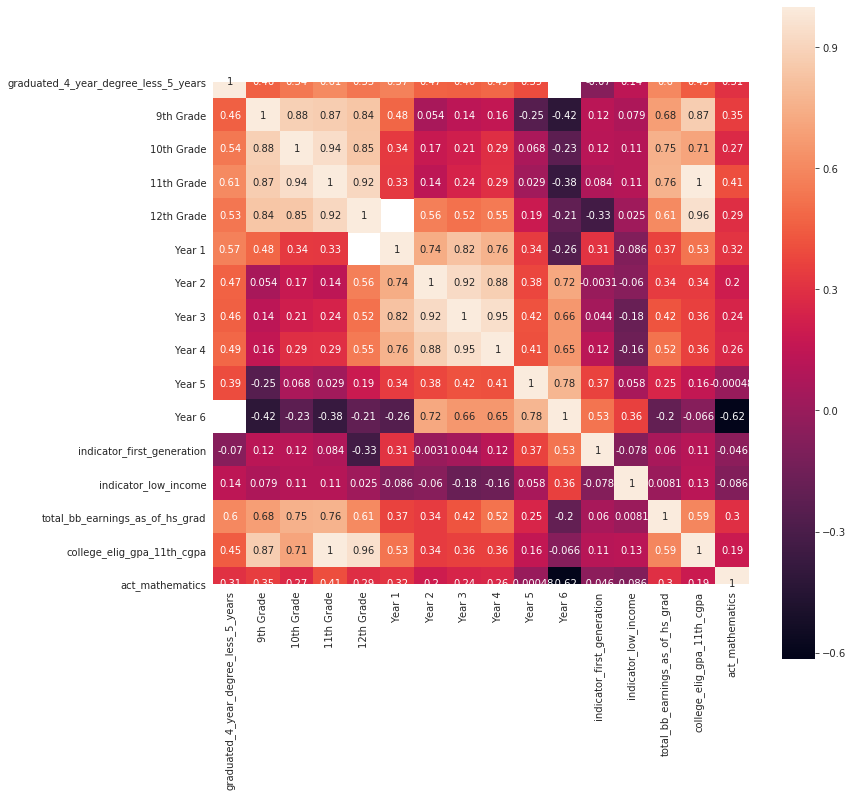

In [127]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corrMatrix, vmax=1, square=True, annot=True)

#### OLS Regression on Math Scores and GPA (All SF Classes)
Given the differences in entrance math scores and GPA data I wanted to investigate how strong of a predictor they are for college graduation. 

As shown on the table below, there is a positive correlation between these factors, though for entrance math scores the correlation is almost 0. For college eligibility, there is a higher coefficient, indicating students with higher 11th grade GPAs were almost 20% more likely to graduate for every whole point increase in their GPA. However, note the R-squared value for this is very low and therefore this shouldn't be viewed as very significant. 

In [128]:

y = df_sub["graduated_4_year_degree_less_5_years"]
X = df_sub[["act_mathematics", 'college_elig_gpa_11th_cgpa', 'total_bb_earnings_as_of_hs_grad']]
X = sm.add_constant(X)

In [129]:
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X)  # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     graduated_4_year_degree_less_5_years   R-squared:                       0.390
Model:                                              OLS   Adj. R-squared:                  0.371
Method:                                   Least Squares   F-statistic:                     20.69
Date:                                  Fri, 06 Mar 2020   Prob (F-statistic):           1.92e-10
Time:                                          15:57:20   Log-Likelihood:                -43.331
No. Observations:                                   101   AIC:                             94.66
Df Residuals:                                        97   BIC:                             105.1
Df Model:                                             3                                         
Covariance Type:                              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3160      0.178     -1.770      0.080      -0.670       0.038
act_mathematics                     0.0160      0.010      1.676      0.097      -0.003       0.035
college_elig_gpa_11th_cgpa          0.0657      0.046      1.414      0.161      -0.027       0.158
total_bb_earnings_as_of_hs_grad     0.0002   3.65e-05      4.712      0.000    9.95e-05       0.000
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.423
Skew:                          -0.079   Prob(JB):                        0.810
Kurtosis:                       2.725   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>
<style>
# Uncomment before publishing
# div.prompt {display:none}
</style>